In [1]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

### Please Use Formatting to Make it Clear What I Should be Looking at! Please!!! I Beg You!!!

In [2]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("data/led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
dfLE.head()


C:\Users\Malit\AppData\Local\Temp\ipykernel_24340\2912163957.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
C:\Users\Malit\AppData\Local\Temp\ipykernel_24340\2912163957.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,4.136734e+09,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,1.166938e+09,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,7.345597e+10,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,2.177835e+10,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,0.000000e+00,NaN,8.84375


<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Show print the labels along with just that column. Print 10 random rows of that data. 

Note: you'll have to look at the units to ensure you get it right. 

In [16]:
#Part 1
dfLE['gdp_per_capita'] = dfLE["GDP"] / dfLE["Population"]

sample_df = dfLE[['gdp_per_capita']].sample(10, random_state=1)

print(sample_df)

     gdp_per_capita
31       378.777345
66     24099.375234
113      306.072088
154     6181.070886
81     23542.348201
122     1456.040068
35      3255.794119
103      571.797607
183     7304.866699
99       334.254756


### Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)

Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options. Think of what to try to Google for an example for printing multiple charts, a grid of charts, etc... and try to adapt one to yours. There is also a way to do it using some thinkstats/thinkplot stuff. 
<li><b>5 points are for doing it in an efficient way - just listing off each column is lots of typing... Remember, the #1 trait of programmers is laziness with respect to repetitive tasks. If we are doing the same thing over and over with tiny changes, try to think of a condensed way to do this...</b>
</ul>

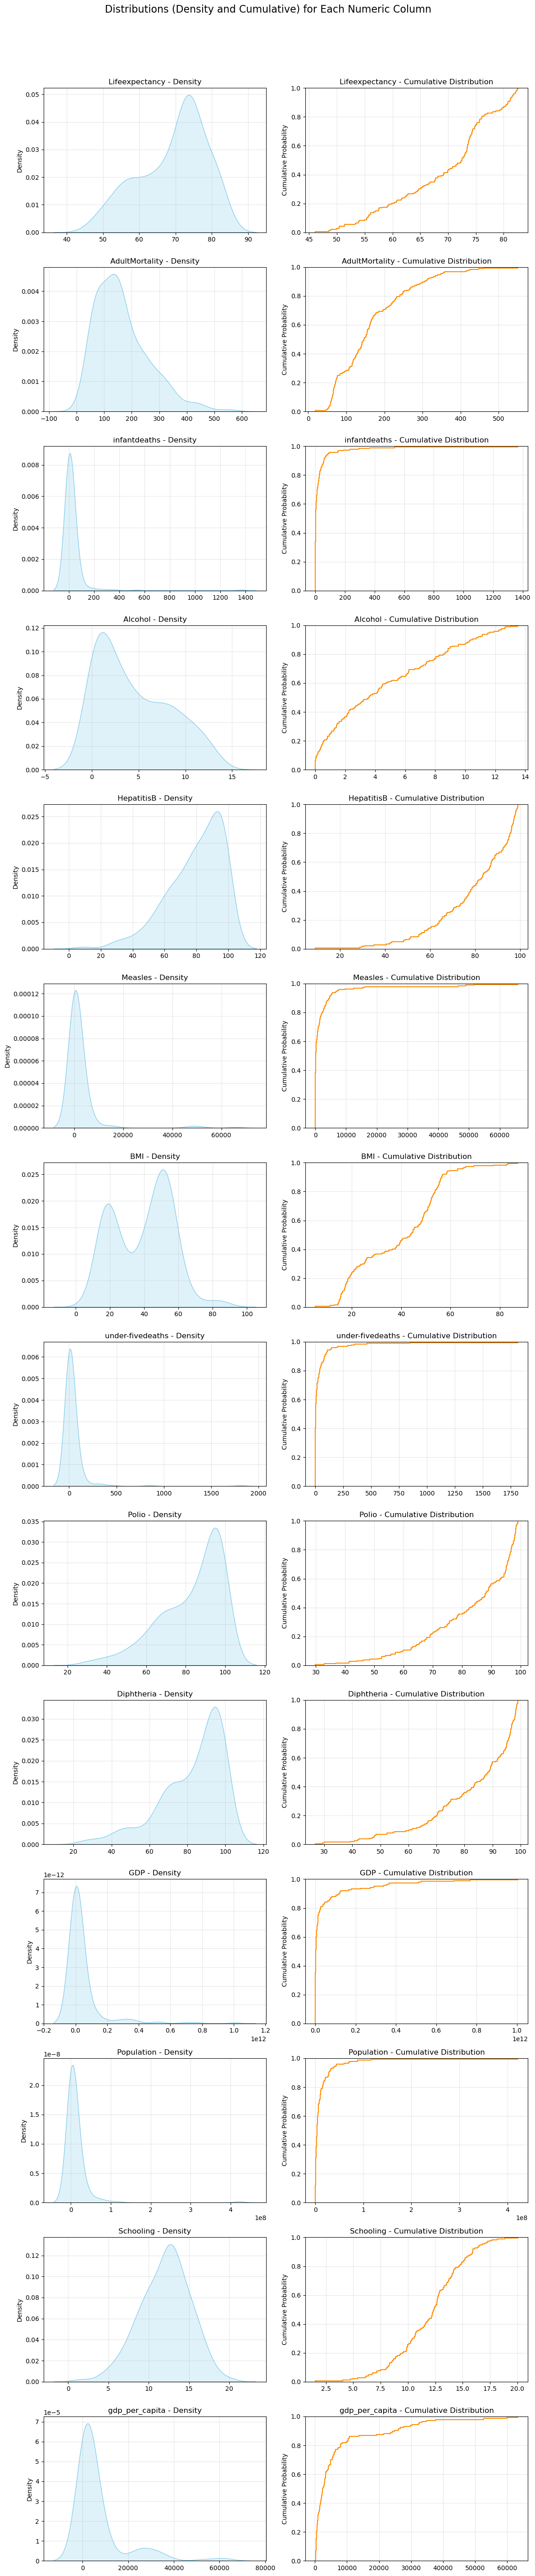

In [55]:
#Print all distributions
numeric_cols = dfLE.select_dtypes(include=[np.number]).columns.drop('isDeveloped')

# Set up subplots: 2 plots per variable (density + CDF)
n = len(numeric_cols)
fig, axes = plt.subplots(nrows=n, ncols=2, figsize=(12, 4*n))
fig.suptitle("Distributions (Density and Cumulative) for Each Numeric Column", fontsize=16, y=1.02)

# Loop through numeric columns
for i, col in enumerate(numeric_cols):
    # Density plot (regular)
    sns.kdeplot(dfLE[col].dropna(), ax=axes[i,0], fill=True, color='skyblue')
    axes[i,0].set_title(f"{col} - Density")
    axes[i,0].set_xlabel("")
    axes[i,0].set_ylabel("Density")
    axes[i,0].grid(True, alpha=0.3)
    
    # Cumulative distribution (CDF)
    sns.ecdfplot(dfLE[col].dropna(), ax=axes[i,1], color='darkorange')
    axes[i,1].set_title(f"{col} - Cumulative Distribution")
    axes[i,1].set_xlabel("")
    axes[i,1].set_ylabel("Cumulative Probability")
    axes[i,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 
</ul>

Mean schooling: 12.03 years
Std dev schooling: 3.10 years


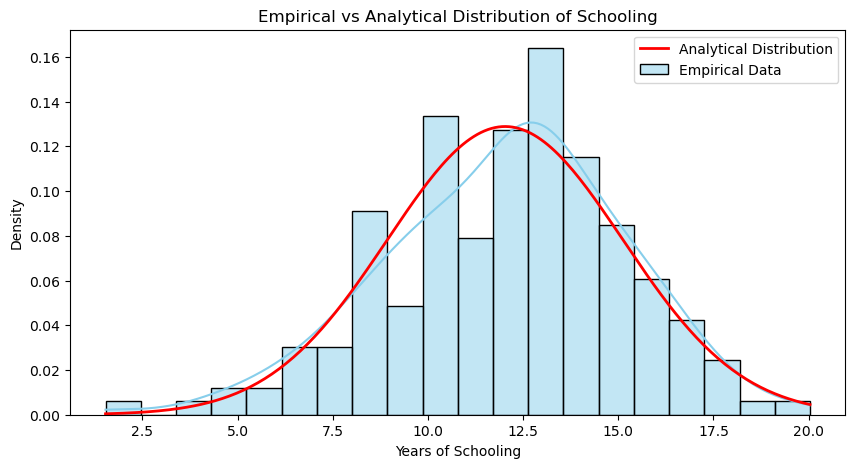

In [58]:
#Analytical for Schooling
schooling = dfLE['Schooling'].dropna()

mean_school = np.mean(schooling)
std_school = np.std(schooling)

print(f"Mean schooling: {mean_school:.2f} years")
print(f"Std dev schooling: {std_school:.2f} years")

# Create analytical (normal) distribution
x = np.linspace(min(schooling), max(schooling), 200)
y = ss.norm.pdf(x, loc=mean_school, scale=std_school)

# Plot
plt.figure(figsize=(10,5))

# Empirical data (histogram + KDE)
sns.histplot(schooling, kde=True, stat="density", color='skyblue', label='Empirical Data', bins=20)

# Analytical normal curve
plt.plot(x, y, 'r-', lw=2, label='Analytical Distribution')

plt.title("Empirical vs Analytical Distribution of Schooling")
plt.xlabel("Years of Schooling")
plt.ylabel("Density")
plt.legend()
plt.show()

In [ ]:
canada_mean = 13.3

# Using the normal CDF
lower = ss.norm.cdf(canada_mean - 1, loc=mean_school, scale=std_school)
upper = ss.norm.cdf(canada_mean + 1, loc=mean_school, scale=std_school)

prob_within_1yr = (upper - lower) * 100
print(f"Predicted % of people within 1 year of Canada's average: {prob_within_1yr:.2f}%")

Predicted % of people within 1 year of Canada's average: 23.35%


### Part 3: Create another analytical distribution for GDP per Capita (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 
</ul>

Lognormal parameters: mu = 7.80, sigma = 1.47


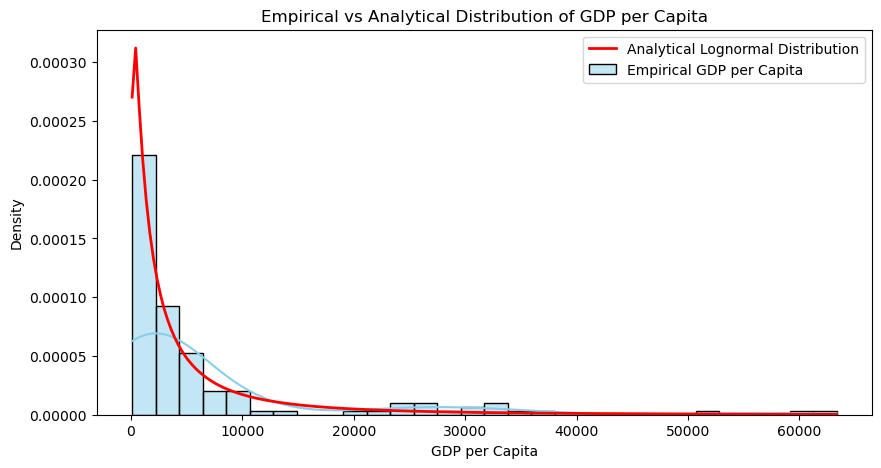

In [62]:
#Analytical for GDP/capita
gdp = dfLE['gdp_per_capita'].dropna()

# Take the log (natural log)
log_gdp = np.log(gdp)

# Compute parameters for the lognormal (mean and std of the log values)
mu = np.mean(log_gdp)
sigma = np.std(log_gdp)

print(f"Lognormal parameters: mu = {mu:.2f}, sigma = {sigma:.2f}")

# Create analytical distribution (x values)
x = np.linspace(min(gdp), max(gdp), 200)
y = ss.lognorm.pdf(x, s=sigma, scale=np.exp(mu))  # scale = exp(mu)

# Plot both empirical and analytical
plt.figure(figsize=(10,5))
sns.histplot(gdp, kde=True, stat="density", color='skyblue', bins=30, label="Empirical GDP per Capita")
plt.plot(x, y, 'r-', lw=2, label="Analytical Lognormal Distribution")
plt.xlabel("GDP per Capita")
plt.ylabel("Density")
plt.title("Empirical vs Analytical Distribution of GDP per Capita")
plt.legend()
plt.show()

### Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)

<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 
</ul>

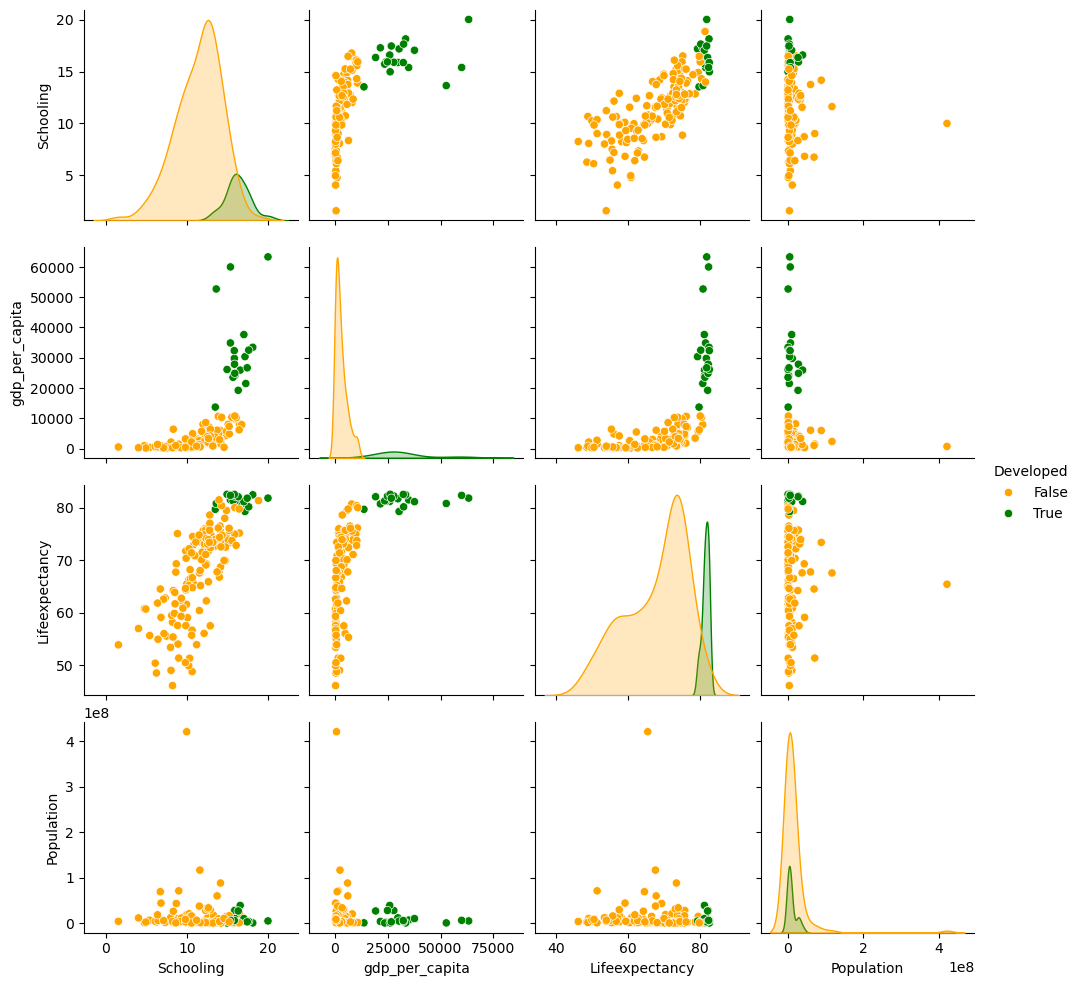

In [63]:
#Visualize correlations. 
developed_threshold = 12000  # USD per capita
dfLE['Developed'] = dfLE['gdp_per_capita'] >= developed_threshold

cols = ['Schooling', 'gdp_per_capita', 'Lifeexpectancy', 'Population']

# Pairplot with developed/not developed disinction
sns.pairplot(dfLE[cols + ['Developed']], hue='Developed', palette={True:'green', False:'orange'})
plt.show()

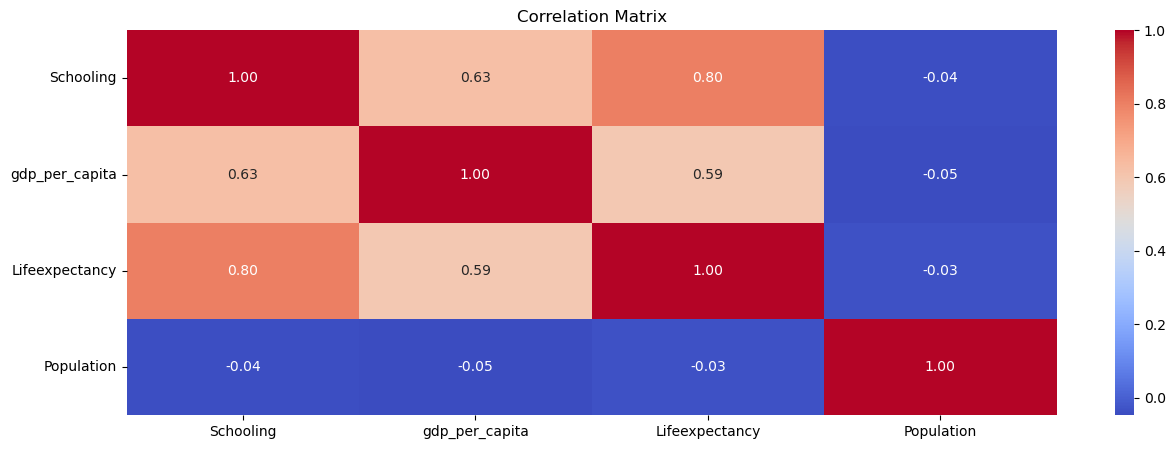

In [ ]:
# Filter outliers -> Population has an extreme outlier at 4*1e8. I think this is an error especially when looking at population vs life expectancy
filtered_data = dfLE[(
    dfLE['Population'] < 300_000_000)
]

subset = filtered_data[cols]

# Compute correlation matrix
corr = subset.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Part 5: Calculate correlations (25pts)

<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?
</ul>

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

In [72]:
#Calculate correlations and analyze. 
developed = dfLE[dfLE['Developed'] == True]
not_developed = dfLE[dfLE['Developed'] == False]

# Select numeric columns (adjust if needed)
numeric_cols = ['Schooling', 'gdp_per_capita', 'Population']

# Correlation matrices
corr_dev = developed[numeric_cols + ['Lifeexpectancy']].corr()['Lifeexpectancy'].sort_values(ascending=False)
corr_not_dev = not_developed[numeric_cols + ['Lifeexpectancy']].corr()['Lifeexpectancy'].sort_values(ascending=False)

# Remove correlation of Life Expectancy with itself
corr_dev = corr_dev.drop('Lifeexpectancy')
corr_not_dev = corr_not_dev.drop('Lifeexpectancy')

# Print 3 strongest correlations
print("Top 3 correlations with Life Expectancy (Developed):")
print(corr_dev.head(3))

print("\nTop 3 correlations with Life Expectancy (Not Developed):")
print(corr_not_dev.head(3))

Top 3 correlations with Life Expectancy (Developed):
Population        0.233710
gdp_per_capita    0.196041
Schooling         0.087431
Name: Lifeexpectancy, dtype: float64

Top 3 correlations with Life Expectancy (Not Developed):
Schooling         0.741491
gdp_per_capita    0.592058
Population       -0.023477
Name: Lifeexpectancy, dtype: float64


#### Developed Countries (Top 3 correlations with Life Expectancy)
1. **Population: 0.23**  
   - Weak positive correlation. In developed countries, larger populations may slightly correspond with longer life expectancy, possibly reflecting larger, well-resourced countries with good healthcare systems.  
   - Effect is minor; likely not causal.

2. **GDP per Capita: 0.20**  
   - Weak positive correlation. Wealthier developed countries tend to have slightly higher life expectancy, which is consistent with reality.  
   - Causal link plausible, but the low correlation suggests other factors (like healthcare access or lifestyle) dominate.

3. **Schooling: 0.09**  
   - Very weak positive correlation. Education level shows minimal effect on life expectancy in developed countries, likely because access to healthcare is already widespread.  
   - Not likely causal in this context; life expectancy is less dependent on schooling once basic infrastructure is in place.

#### Not Developed Countries (Top 3 correlations with Life Expectancy)
1. **Schooling: 0.74**  
   - Strong positive correlation. Higher education strongly corresponds with longer life expectancy.  
   - Supported by reality: education improves health knowledge, hygiene, and ability to navigate healthcare systems.  
   - Likely causal.

2. **GDP per Capita: 0.59**  
   - Moderate positive correlation. Wealthier developing countries have better life expectancy, reflecting greater resources for healthcare, nutrition, and sanitation.  
   - Plausibly causal, though some confounding with education.

3. **Population: -0.02**  
   - Essentially no correlation. Population size does not strongly affect life expectancy in developing countries overall, though extreme outliers could matter.

---

#### Substantial Differences in Relationships Between Developed and Not Developed Countries

1. **Population vs Life Expectancy**  
   - Developed: weak positive correlation (0.23)  
   - Not Developed: negligible correlation (-0.02)  
   - Interpretation: In developed countries, larger populations might indicate larger economies or better infrastructure, slightly supporting higher life expectancy. In developing countries, population size alone does not explain health outcomes.  
   - To confirm: Compare population density, healthcare infrastructure per capita, and urbanization effects.

2. **Schooling vs Life Expectancy**  
   - Developed: very weak correlation (0.09)  
   - Not Developed: strong correlation (0.74)  
   - Interpretation: Education strongly affects health outcomes in developing countries, but in developed countries, basic education is already widespread and its effect is minimal.  
   - To confirm: Examine access to quality education and its relationship to healthcare behavior across different countries.
